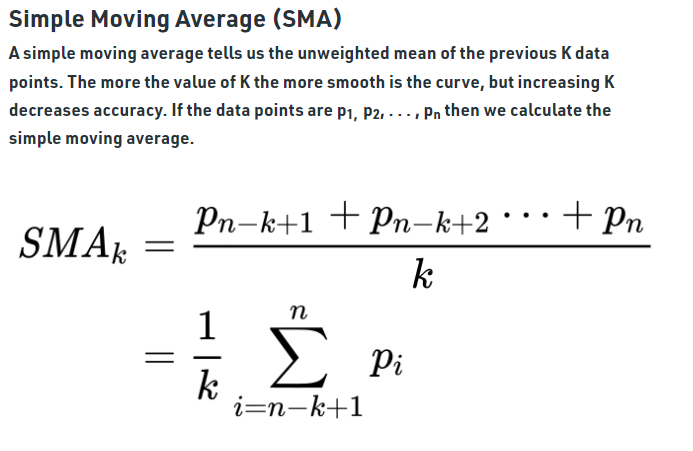

# In Python, we can calculate the moving average using .rolling() method. This method provides rolling windows over the data, and we can use the mean function over these windows to calculate moving averages. The size of the window is passed as a parameter in the function .rolling(window).

# Now let’s see an example of how to calculate a simple rolling mean over a period of 30 days.

# Step 1: Importing Libraries

In [1]:
# importing Libraries

# importing pandas as pd
import pandas as pd

# importing numpy as np
# for Mathematical calculations
import numpy as np

# importing pyplot from matplotlib as plt
# for plotting graphs
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline


# Step 2: Importing Data 
# To import data we will use pandas  .read_csv() function

In [2]:
# importing time-series data
reliance = pd.read_csv('RELIANCE.NS_.csv', index_col='Date',
parse_dates=True)

# Printing dataFrame
reliance.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-21,507.192322,507.687622,497.781525,498.450195,485.688568,3097170.0
2016-07-22,498.276825,504.121429,497.831055,502.660278,489.790863,3184126.0
2016-07-25,502.239258,507.068512,498.945496,506.573181,493.603546,3803482.0
2016-07-26,506.697021,512.541626,502.833649,507.217102,494.231049,4853316.0
2016-07-27,506.721771,508.182922,499.737976,501.793488,488.946259,5090697.0


# To calculate SMA in Python we will use Pandas dataframe.rolling() function that helps us to make calculations on a rolling window. On the rolling window, we will use .mean() function to calculate the mean of each window.

# Syntax: DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0).mean()

# Parameters :

# window : Size of the window. That is how many observations we have to take for the calculation of each window.
# min_periods : Least number of observations in a window required to have a value (otherwise result is NA).
# center : It is used to set the labels at the center of the window.
# win_type : It is used to set the window type.
# on : Datetime column of our dataframe on which we have to calculate rolling mean.
# axis : integer or string, default 0

In [3]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas series
# into dataframe.
reliance = reliance['Close'].to_frame()

# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
reliance['SMA30'] = reliance['Close'].rolling(30).mean()

# removing all the NULL values using
# dropna() method
reliance.dropna(inplace=True)

# printing Dataframe
reliance


,Close,SMA30
Date,,
2016-09-01,509.767914,505.689072
2016-09-02,501.917328,505.804643
2016-09-06,505.161560,505.888019
2016-09-07,504.047150,505.803818
2016-09-08,511.848175,505.958187
...,...,...
2021-07-14,2086.000000,2160.583325
2021-07-15,2082.350098,2156.339998
2021-07-16,2112.399902,2153.736662


# Step 4: Plotting Simple Moving Averages

<AxesSubplot:xlabel='Date'>

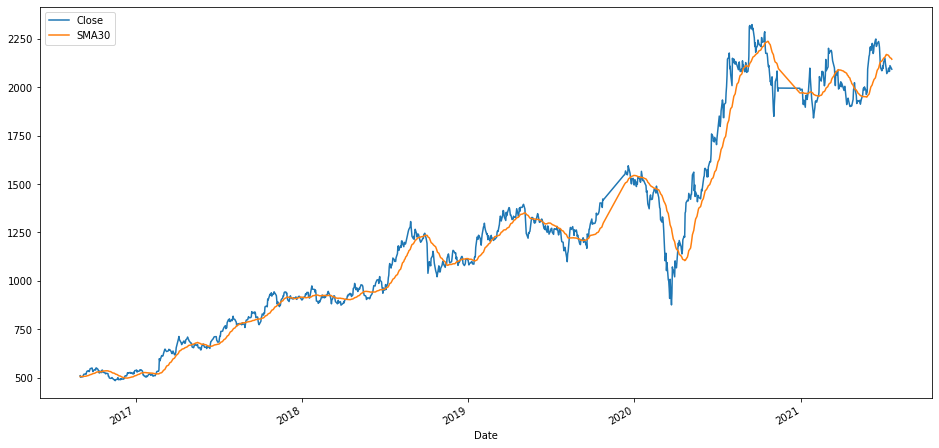

In [6]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
reliance[['Close', 'SMA30']].plot(label='RELIANCE',
figsize=(16, 8))


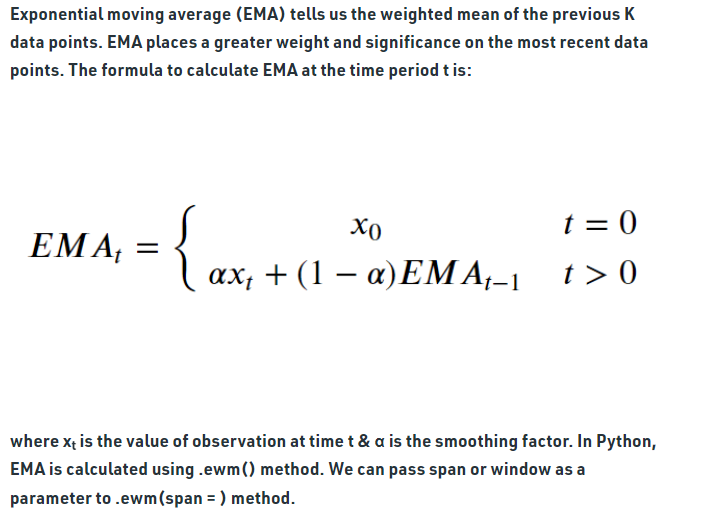

# Calculating Exponential Moving Average
# To calculate EMA in Python we use dataframe.ewm() function. It provides us exponentially weighted functions. We will be using .mean() function to calculate EMA.

# Syntax: DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None).mean()

# Parameters:

# com : float, optional . It is the decay in terms of centre of mass.
# span : float, optional . It is the decay in terms of span.
# halflife : float, str, timedelta, optional . It is the decay in terms of halflife.
# alpha : float, optional . It is the smoothing factor having value between 0 and 1 , 1 inclusive .
# min_periods : int, default 0. Least number of observations in a window required to have a value (otherwise result is NA).
# adjust : bool, default True . Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average)
# ignore_na : Ignore missing values when calculating weights; specify True to reproduce pre-0.15.0 behavior.
# axis : The axis to use. The value 0 identifies the rows, and 1 identifies the columns.

In [7]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas
# series into dataframe.
reliance = reliance['Close'].to_frame()

# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
reliance['EWMA30'] = reliance['Close'].ewm(span=30).mean()

# printing Dataframe
reliance


,Close,EWMA30
Date,,
2016-09-01,509.767914,509.767914
2016-09-02,501.917328,505.711778
2016-09-06,505.161560,505.516014
2016-09-07,504.047150,505.111288
2016-09-08,511.848175,506.644093
...,...,...
2021-07-14,2086.000000,2117.648949
2021-07-15,2082.350098,2115.371604
2021-07-16,2112.399902,2115.179881


<AxesSubplot:xlabel='Date'>

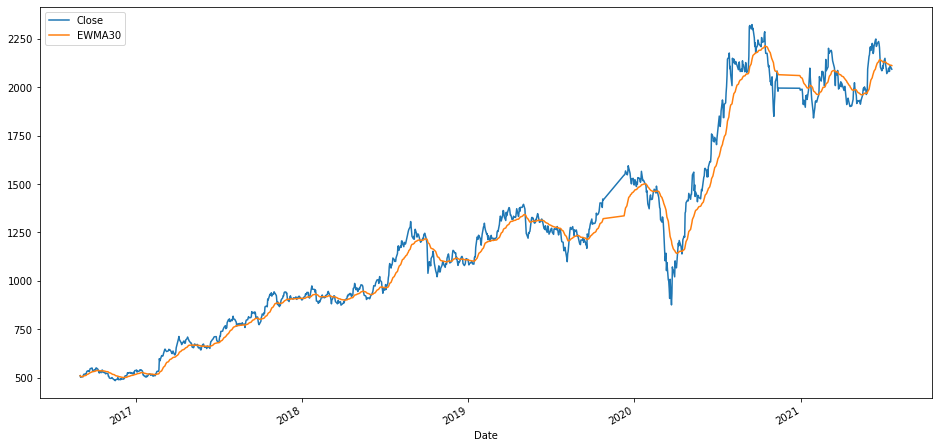

In [8]:
# plotting Close price and exponential
# moving averages of 30 days
# using .plot() method
reliance[['Close', 'EWMA30']].plot(label='RELIANCE',
figsize=(16, 8))
